In [3]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# 1D (that is a value and its image)

## Simple case

Triangulation of a set of points and its visualization.

(4, 2)


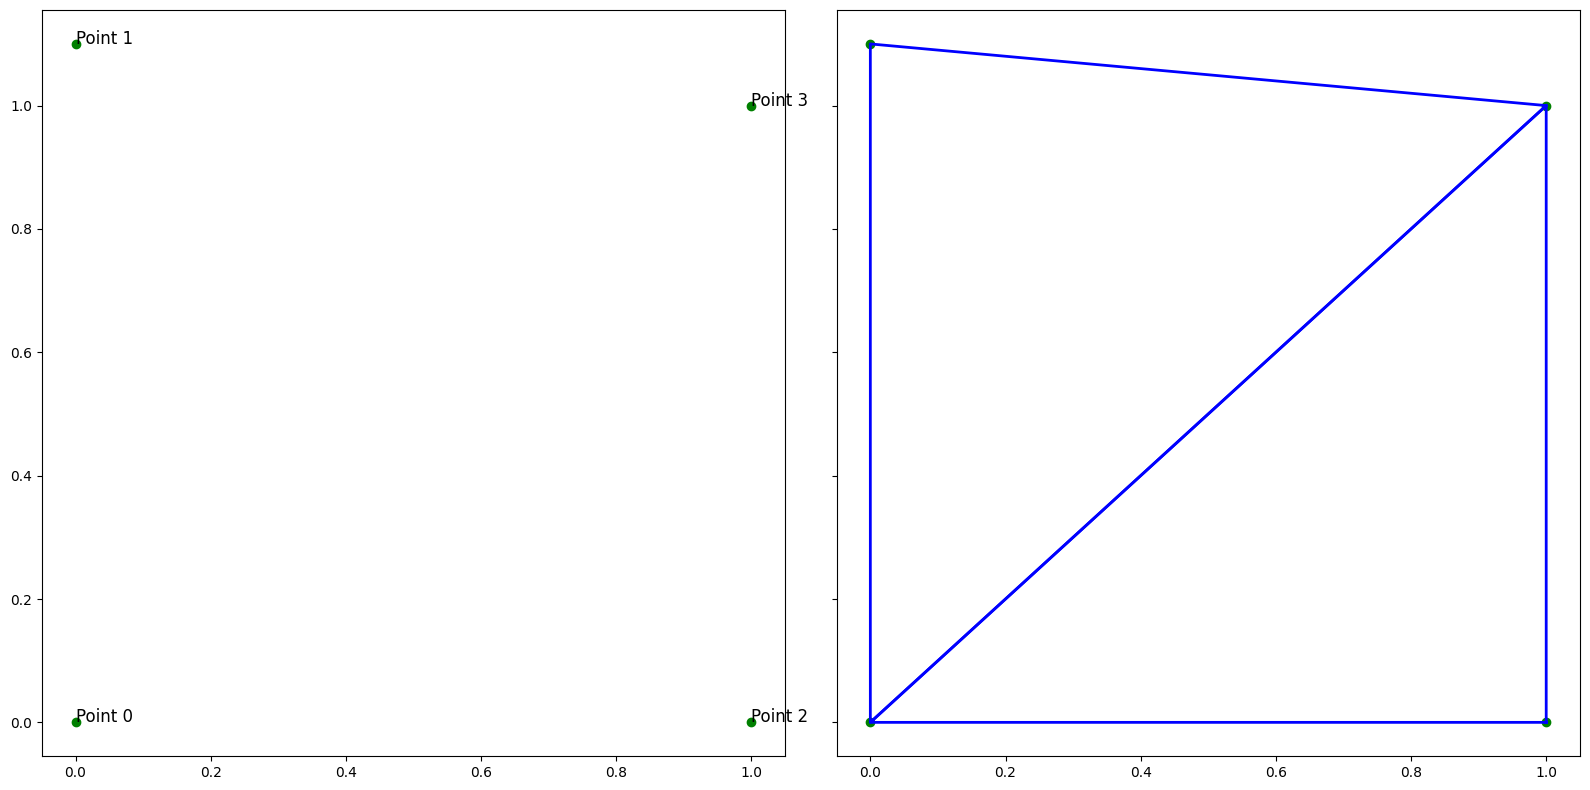

In [51]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
print(points.shape)
tri = Delaunay(points, qhull_options="QJ")


fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(points[:,0], points[:,1], 'go') # just the points

for i in range(len(points)):
    axs[0].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

axs[1].plot(points[:,0], points[:,1], 'go') # just the points
# axs[1].triplot(points[:,0], points[:,1], tri.simplices) #opcion b
for simplex in tri.simplices:
    # Obtener las coordenadas de los puntos correspondientes
    p1 = points[simplex[0]]  # restamos 1 porque los índices en Python empiezan desde 0
    p2 = points[simplex[1]]
    p3 = points[simplex[2]]
    
    # Crear el triángulo trazando líneas entre los puntos
    triangle = np.array([p1, p2, p3, p1])  # El último punto es el mismo que el primero para cerrar el triángulo
    axs[1].plot(triangle[:, 0], triangle[:, 1], 'b-', linewidth=2)

plt.tight_layout()
plt.show()

The vertices that forms the triangle, for example the first triangle is form by points 2, 3 and 0, corresponding to the bottom triangle

In [36]:
tri.simplices 

array([[2, 3, 0],
       [3, 1, 0]], dtype=int32)

We can find out which triangle points are in:

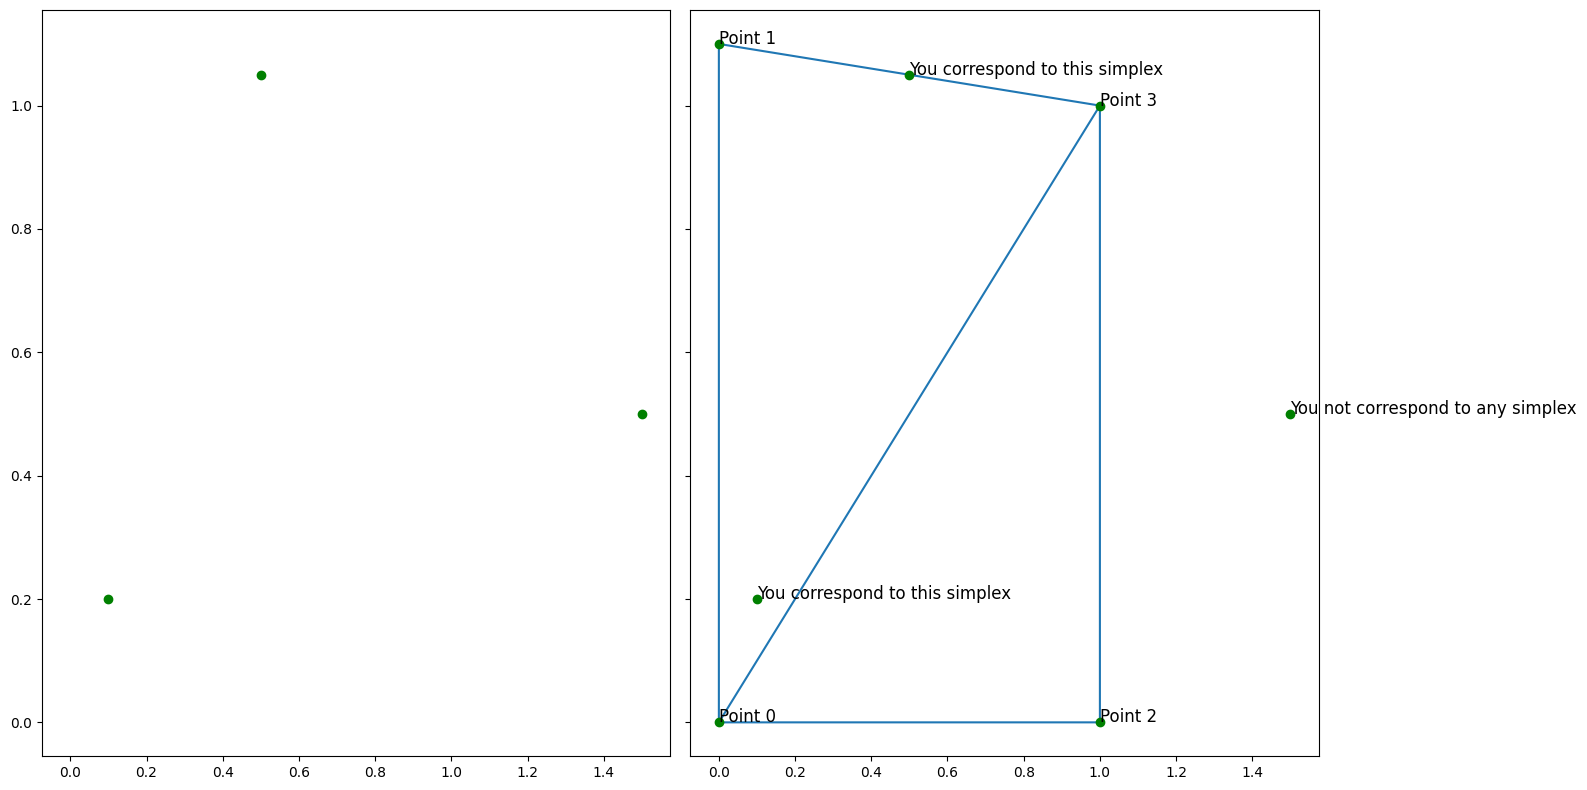

In [37]:
p = np.array([(0.1, 0.2), (1.5, 0.5), (0.5, 1.05)])
inside = tri.find_simplex(p)

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(p[:,0], p[:,1], 'go') # just the points

axs[1].plot(p[:,0], p[:,1], 'go') # just the points
for i in range(len(p)):
    if inside[i] == 1:
        axs[1].text(p[i,0], p[i,1], f"You correspond to this simplex", fontsize=12, color="black")
    else:
         axs[1].text(p[i,0], p[i,1], f"You not correspond to any simplex", fontsize=12, color="black")

axs[1].triplot(points[:,0], points[:,1], tri.simplices)
axs[1].plot(points[:,0], points[:,1], 'go') # just the points
for i in range(len(points)):
    axs[1].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

plt.tight_layout()
plt.show()


In [38]:
tri.simplices[tri.find_simplex(p[inside==1])] # it said to which simplex, and which vertex form the simple the point correspond, only for valid points

array([[3, 1, 0],
       [3, 1, 0]], dtype=int32)

We can also compute barycentric coordinates in triangle 1 for these points:

The coordinates for the first point are all positive, meaning it is indeed inside the triangle. The third point is on an edge, hence its null third coordinate.

In [39]:
b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))
np.c_[np.transpose(b), 1 - b.sum(axis=0)]

array([[ 0.1       ,  0.09090909,  0.80909091],
       [ 1.5       , -0.90909091,  0.40909091],
       [ 0.5       ,  0.5       ,  0.        ]])

## For a more complex case

(100, 1)
(100, 1)
(100, 2)


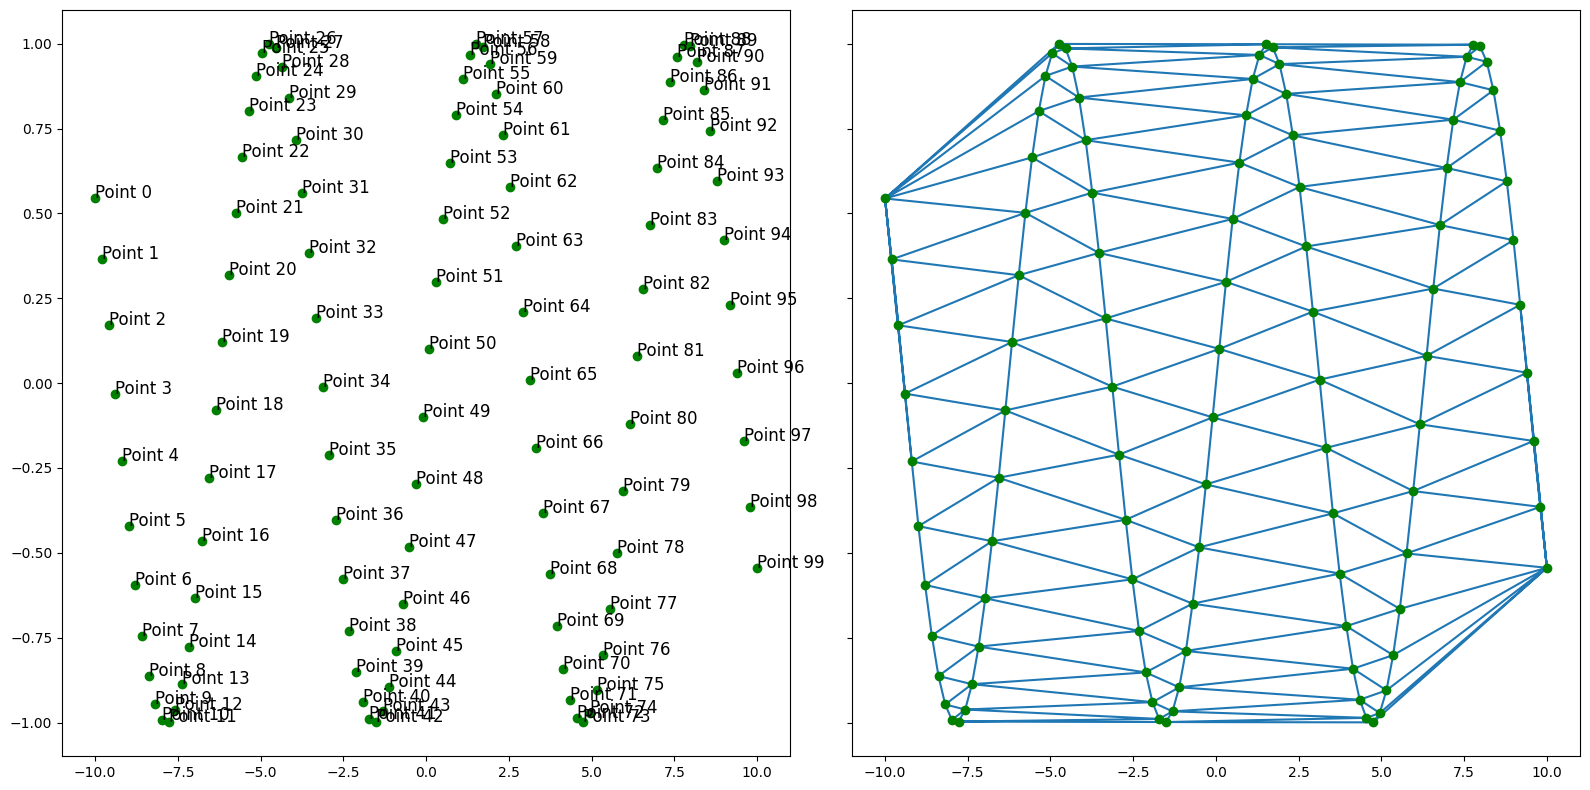

In [41]:
x = np.linspace(-10,10,100).reshape((100,-1))
print(x.shape)
y = np.sin(x)
print(y.shape)

points = np.concatenate((x,y),axis=1)
print(points.shape) # need in this shape

tri = Delaunay(points, qhull_options="QJ")

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(points[:,0], points[:,1], 'go') # just the points

for i in range(len(points)):
    axs[0].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

axs[1].triplot(points[:,0], points[:,1], tri.simplices)
axs[1].plot(points[:,0], points[:,1], 'go') # just the points

plt.tight_layout()
plt.show()

Realmente lo que suponemos es que para cada punto $p_i = (x_i, y_i)$ realmente le corresponde un valor $z_i$, es decir tenemos una $f: R^2 \to R$, entonces queremos que si para un punto desconocido p, en el sentido de que solo sabemos sus coordenadas x e y, queremos predecir su z, para ello tenemos que calcular sus coordenadas baricentricas y así saber que contribucion tiene para vertice del simplice al que pertenece y gnerar la prediccion.

# 2D

(20,)
(20,)
(20,)
(20, 20)
(20, 20)
(20, 20)


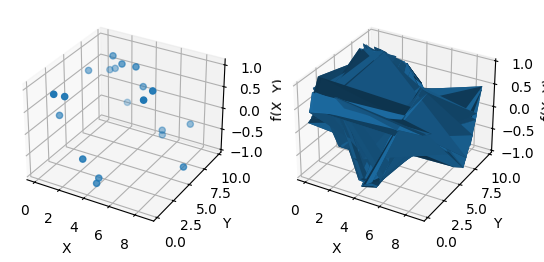

In [77]:
# Definimos una función f: R^2 -> R (por ejemplo, una parabólica)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

np.random.seed(1)
# Creamos una malla de puntos en el plano xy
x = np.random.uniform(0, 10, 20)
y = np.random.uniform(0, 10, 20)
print(x.shape)
print(y.shape)
z = f(x, y)
print(z.shape)

X, Y = np.meshgrid(x, y)
print(X.shape)
print(Y.shape)
Z = f(X,Y)
print(Z.shape)

# Creamos el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(1,2,1, projection='3d')

# Graficamos los puntos con scatter
ax.scatter(x, y, z)

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z)

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

plt.show()


(20, 2)


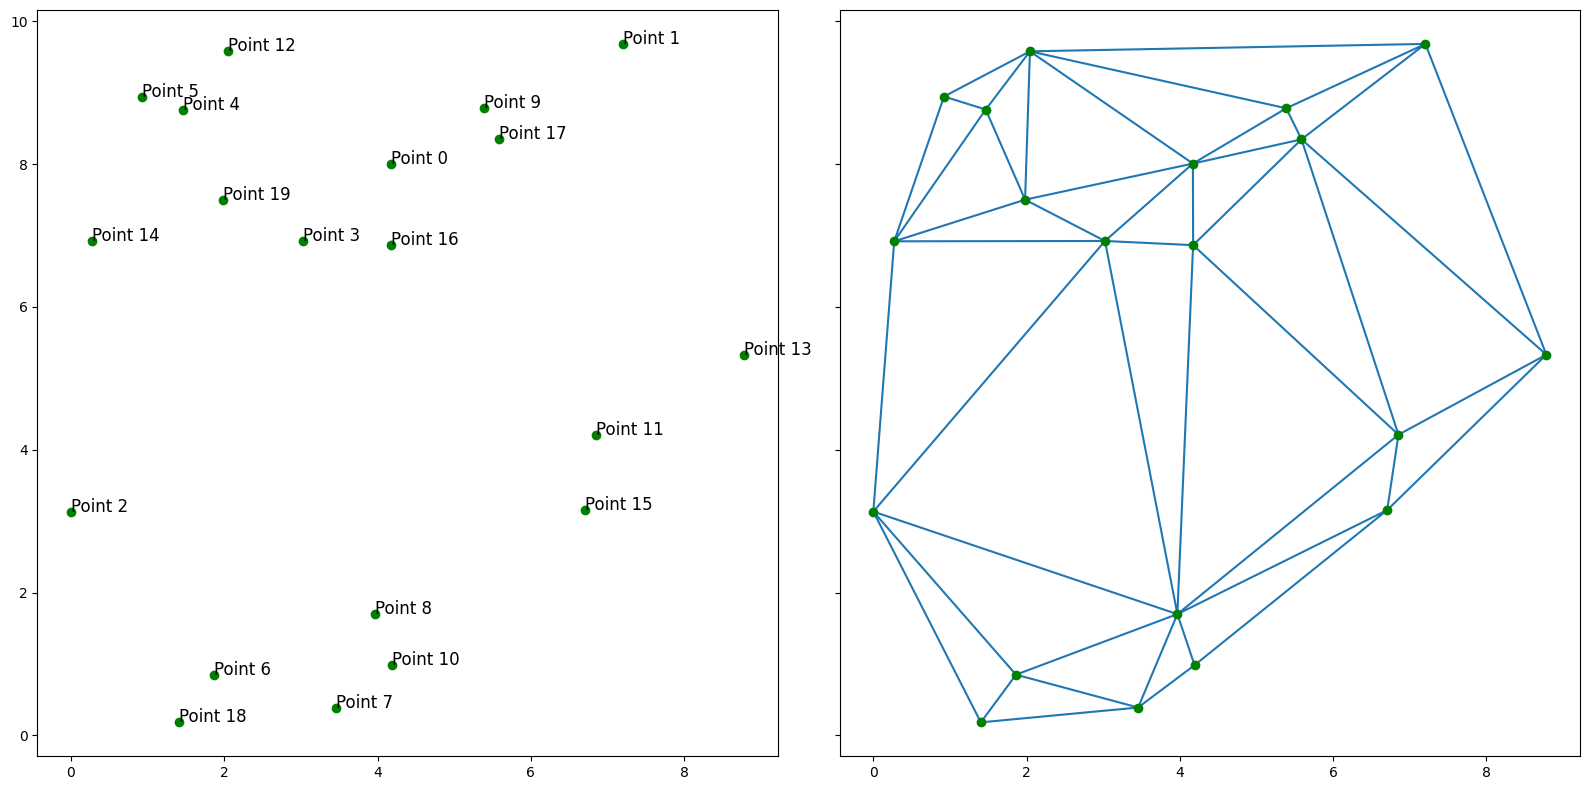

In [78]:
points = np.concatenate((x.reshape((len(x), -1)), y.reshape((len(y), -1))), axis=1)
print(points.shape)

# Perform Delaunay triangulation
tri = Delaunay(points, qhull_options="QJ")
tri.simplices

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(points[:,0], points[:,1], 'go') # just the points

for i in range(len(points)):
    axs[0].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

axs[1].triplot(points[:,0], points[:,1], tri.simplices)
axs[1].plot(points[:,0], points[:,1], 'go') # just the points

plt.tight_layout()
plt.show()

In [93]:
p = np.array([(2,8)])
print(tri.find_simplex(p))
indices=tri.simplices[tri.find_simplex(p)]
print(indices[0])

[19]
[ 0 12 19]


In [103]:
b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))
ts = np.c_[np.transpose(b), 1 - b.sum(axis=0)]
print(ts)

zp = ts[0][0] * x[indices[0][0]] + ts[0][1] * x[indices[0][1]] + ts[0][1] * x[indices[0][1]]
print(zp)

[[ 4.36934295 -1.68741746 -1.68192549]]
11.321195647706041


(20, 2)


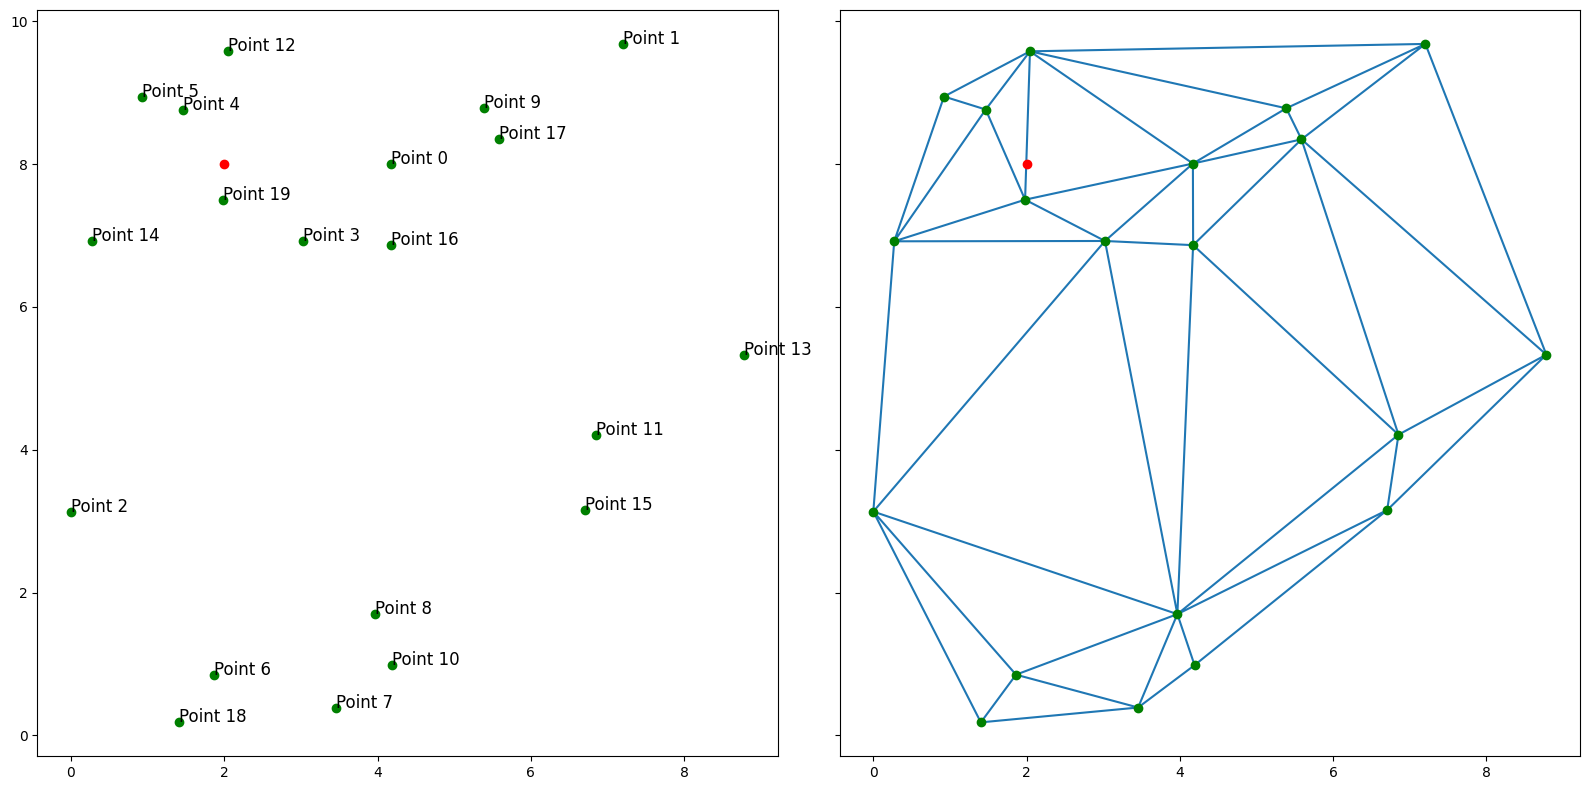

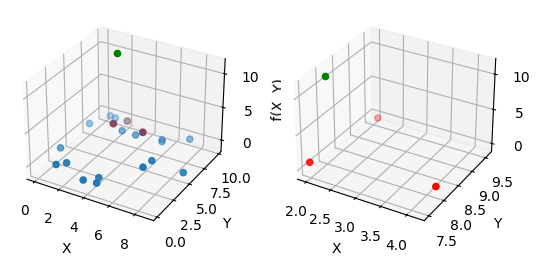

In [108]:
points = np.concatenate((x.reshape((len(x), -1)), y.reshape((len(y), -1))), axis=1)
print(points.shape)

# Perform Delaunay triangulation
tri = Delaunay(points, qhull_options="QJ")
tri.simplices

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(points[:,0], points[:,1], 'go') # just the points
axs[0].plot(p[:,0],p[:,1],'ro')
for i in range(len(points)):
    axs[0].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

axs[1].triplot(points[:,0], points[:,1], tri.simplices)
axs[1].plot(points[:,0], points[:,1], 'go') # just the points
axs[1].plot(p[:,0],p[:,1],'ro')

plt.tight_layout()
plt.show()

fig = plt.figure()

ax = fig.add_subplot(1,2,1, projection='3d')

# Graficamos los puntos con scatter
ax.scatter(x, y, z)
ax.scatter(x[indices[0]], y[indices[0]], z[indices[0]],c="r")
ax.scatter(p[:,0], p[:,1], zp,c="g")
# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

ax = fig.add_subplot(1,2,2, projection='3d')

# Graficamos los puntos con scatter
ax.scatter(x[indices[0]], y[indices[0]], z[indices[0]],c="r")
ax.scatter(p[:,0], p[:,1], zp,c="g")
# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

plt.show()